In [1]:
import numpy as np
import openturns as ot
from dependence import ImpactOfDependence
 
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## With Gaussian Copula

In [2]:
dim = 3
alpha = 0.05 
threshold = 2.
N = 10000
n = 1
measure = "KendallTau"
margins = [ot.Normal(), ot.Normal(), ot.Normal()]

families = np.zeros((dim, dim), dtype=int)
families[1, 0] = 1
families[2, 0] = 1
families[2, 1] = 0

In [3]:
def add_function(x):
    """
    """
    return x.sum(axis=1)

In [4]:
impact = ImpactOfDependence(model_func=add_function, margins=margins, families=families, 
                            copula_type='normal')

impact.run(n_dep_param=N, n_input_sample=n, fixed_grid=False, 
           dep_measure=measure, seed=0)

<IPython.core.display.Javascript object>


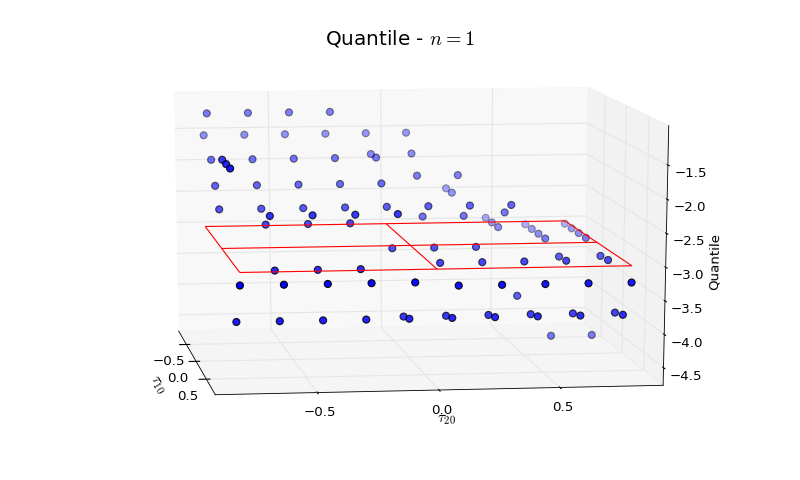

In [5]:
from pyquantregForest import QuantileForest

quant_reg = QuantileForest(500, min_samples_leaf=150, n_jobs=8)
impact.build_forest(quant_reg)
quant_result_rf = impact.compute_quantiles(alpha, estimation_method='randomforest', grid_size=10)
quant_result_rf.draw('KendallTau')

In [69]:
impact.save_data()

In [33]:
impact_load = ImpactOfDependence.from_structured_data()

40


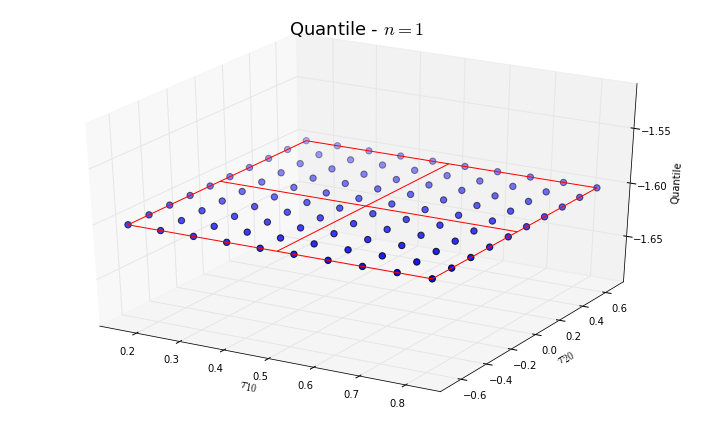

In [34]:
quant_reg = QuantileForest(500, min_samples_leaf=200, n_jobs=8)
impact_load.build_forest(quant_reg)
quant_result_rf_l = impact_load.compute_quantiles(alpha, estimation_method='randomforest', grid_size=10)
quant_result_rf_l.draw('KendallTau')

In [35]:
quant_result_rf.quantity.shape

(100L,)

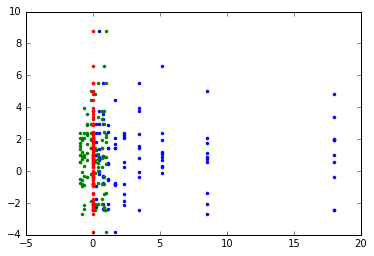

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(impact._all_params, impact._output_sample, '.')